# OSCILLATION
***
## 1. Simple Harmonic Oscillation


![alt A simple pendulum](https://user-images.githubusercontent.com/62984222/78111446-a0eaff00-7437-11ea-91e6-22a9118d9475.png)

진자의 운동 방정식은 다음과 같다.  
### $\tau = I\alpha = -mgL\sin\theta$  
### $\ddot\theta = -{g\over L}\sin\theta$  
각도 $\theta $가 작을 경우 $\sin\theta \approx \theta $가 되어 단진자 운동을 하게 된다.  
### ${d^2\theta \over dt^2} = -{g\over L}\theta$  

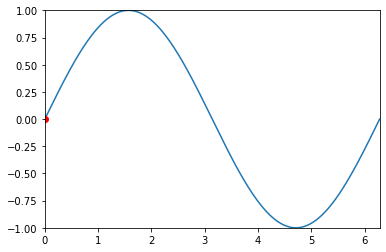

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

myAnimation

실제 진자의 운동에는 마찰력이나 공기저항과 같은 damping 요소 외력 요소를 고려할 수 있다.  
### $\ddot\theta = -{g\over L}\sin\theta - \beta\dot\theta + A\sin(\omega_d t)$

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

steps = 100
N = 300
skip = 100

v_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05, value=0.0)
theta_widget = widgets.FloatSlider(min=0.0, max=np.pi, step=0.05, value=np.pi/6.0)
beta_widget = widgets.FloatSlider(min=0.0, max=1, step=0.05, value=0.5)
amp_widget = widgets.FloatSlider(min=0.0, max=5, step=0.05, value=1.2)
omegad_widget = widgets.FloatSlider(min=0.1, max=1, step=0.001, value=0.724)

def Solver_ODE(v, theta, beta, amp, omega_d):
    initial_state = np.array([theta,v])
    time_step = 2.0 * np.pi/(omega_d*steps)
    time = np.arange(0.0,N*(2.0*np.pi)/omega_d,time_step)
    answer = odeint(DE_pendulum, initial_state, time,args=(beta,amp,omega_d))
    
    plt.figure(figsize=(10, 20))
    
    plt.subplot(2, 1, 1) 
    plt.plot(time[:1000]*omega_d/(2.0*np.pi),answer[:1000,1],'r')
    plt.title('Real pendulum motion')
    plt.xlabel('Time(s)')
    plt.ylabel('Anglular velocity')
    
    
    answer = answer[skip*steps:]
    for i, position in enumerate(answer[:,0]):
        while position > np.pi:
            position = position - (2.0*np.pi)
        while position < -np.pi:
            position = position + (2.0*np.pi)
        answer[i,0] = position

    offset = 50
    max_index = (N-skip)*steps - offset

    P_thetas = []
    P_omegas = []

    for j in range(offset, max_index, steps):
        P_thetas.append(answer[j,0])
        P_omegas.append(answer[j,1])
    
    plt.subplot(2, 1, 2)
    plt.plot(answer[:,0],answer[:,1],'c.')
    plt.plot(P_thetas, P_omegas,'b.')
    plt.title('Phase-Space Diagram')
    plt.xlabel('Angle')
    plt.ylabel('Anglular velocity')
    plt.legend(['Phase-Space', 'Poincare section'])
    plt.xlim(-np.pi,np.pi)    
    plt.show()
    
def DE_pendulum(y,time,beta,amp,omega_d):
    g0 = y[1]
    g1 = -np.sin(y[0])-beta*y[1]+amp*np.sin(omega_d*time)
    return np.array([g0,g1])
    
interact(Solver_ODE,v=v_widget, theta=theta_widget, beta=beta_widget, amp=amp_widget, omega_d=omegad_widget);


interactive(children=(FloatSlider(value=0.0, description='v', max=10.0, step=0.05), FloatSlider(value=0.523598…